# Sample Name

How to use Template:
    i.  Change file Address
    ii. Set 'truncate' True if the initial data ranges from 0 to Bmax

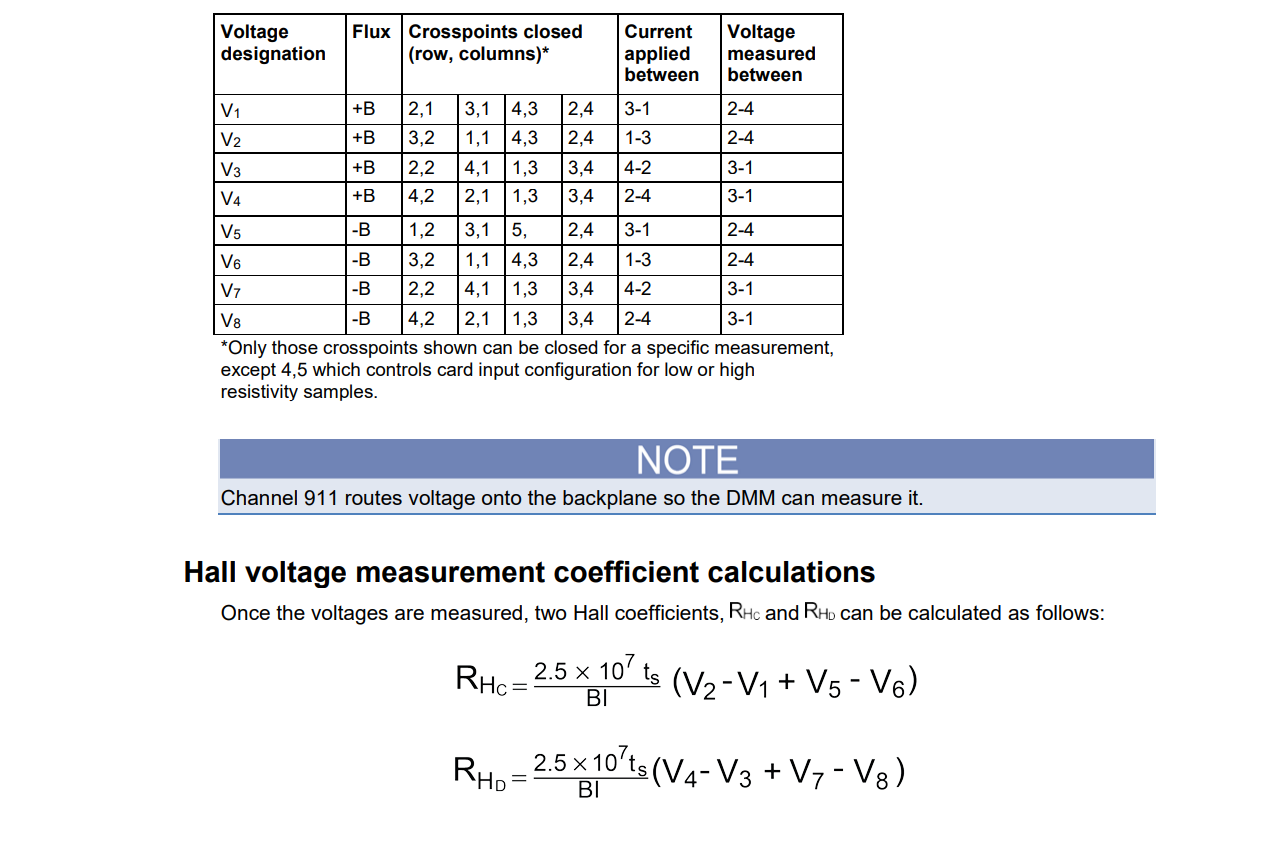

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [5]:
truncate = False # True it contains data from O to Bmax
path = r"C:\Users\Admin\Desktop\Analysis\Data\A302\HALL"
filename = 'A304_SRO_NGO_1_5p_1_5n_150K.csv'
df = pd.read_csv(os.path.join(path, filename), names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value','multiplier'])
df


,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.00005,20000.622949,149.999108,165.878721,-165.865232,-166.207017,166.263129,5.046000e-07,1000000.0
1,0.00005,19000.366113,150.000464,166.320564,-166.330084,-166.650540,166.683901,5.286000e-07,1000000.0
2,0.00005,18000.597559,150.000069,166.801803,-166.806791,-167.073106,167.117593,5.415000e-07,1000000.0
3,0.00005,17000.331152,150.000139,167.264690,-167.281282,-167.548075,167.601733,5.380000e-07,1000000.0
4,0.00005,16000.584766,150.000511,167.761976,-167.755621,-168.006190,168.008311,5.632000e-07,1000000.0
...,...,...,...,...,...,...,...,...,...
121,0.00005,16000.590576,150.000600,167.677303,-167.680498,-167.930314,167.954081,6.134000e-07,1000000.0
122,0.00005,17000.290039,150.000057,167.194970,-167.193199,-167.467398,167.495030,6.170000e-07,1000000.0
123,0.00005,18000.450000,150.000616,166.689936,-166.705954,-167.019570,167.058007,5.979000e-07,1000000.0
124,0.00005,19000.381836,150.000533,166.215181,-166.251367,-166.588741,166.599398,5.858000e-07,1000000.0


### Converting B to integer B

In [6]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B','B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [7]:

df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.00005,20000.622949,20000,149.999108,165.878721,-165.865232,-166.207017,166.263129,5.046000e-07,1000000.0
1,0.00005,19000.366113,19000,150.000464,166.320564,-166.330084,-166.650540,166.683901,5.286000e-07,1000000.0
2,0.00005,18000.597559,18000,150.000069,166.801803,-166.806791,-167.073106,167.117593,5.415000e-07,1000000.0
3,0.00005,17000.331152,17000,150.000139,167.264690,-167.281282,-167.548075,167.601733,5.380000e-07,1000000.0
4,0.00005,16000.584766,16000,150.000511,167.761976,-167.755621,-168.006190,168.008311,5.632000e-07,1000000.0


In [8]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

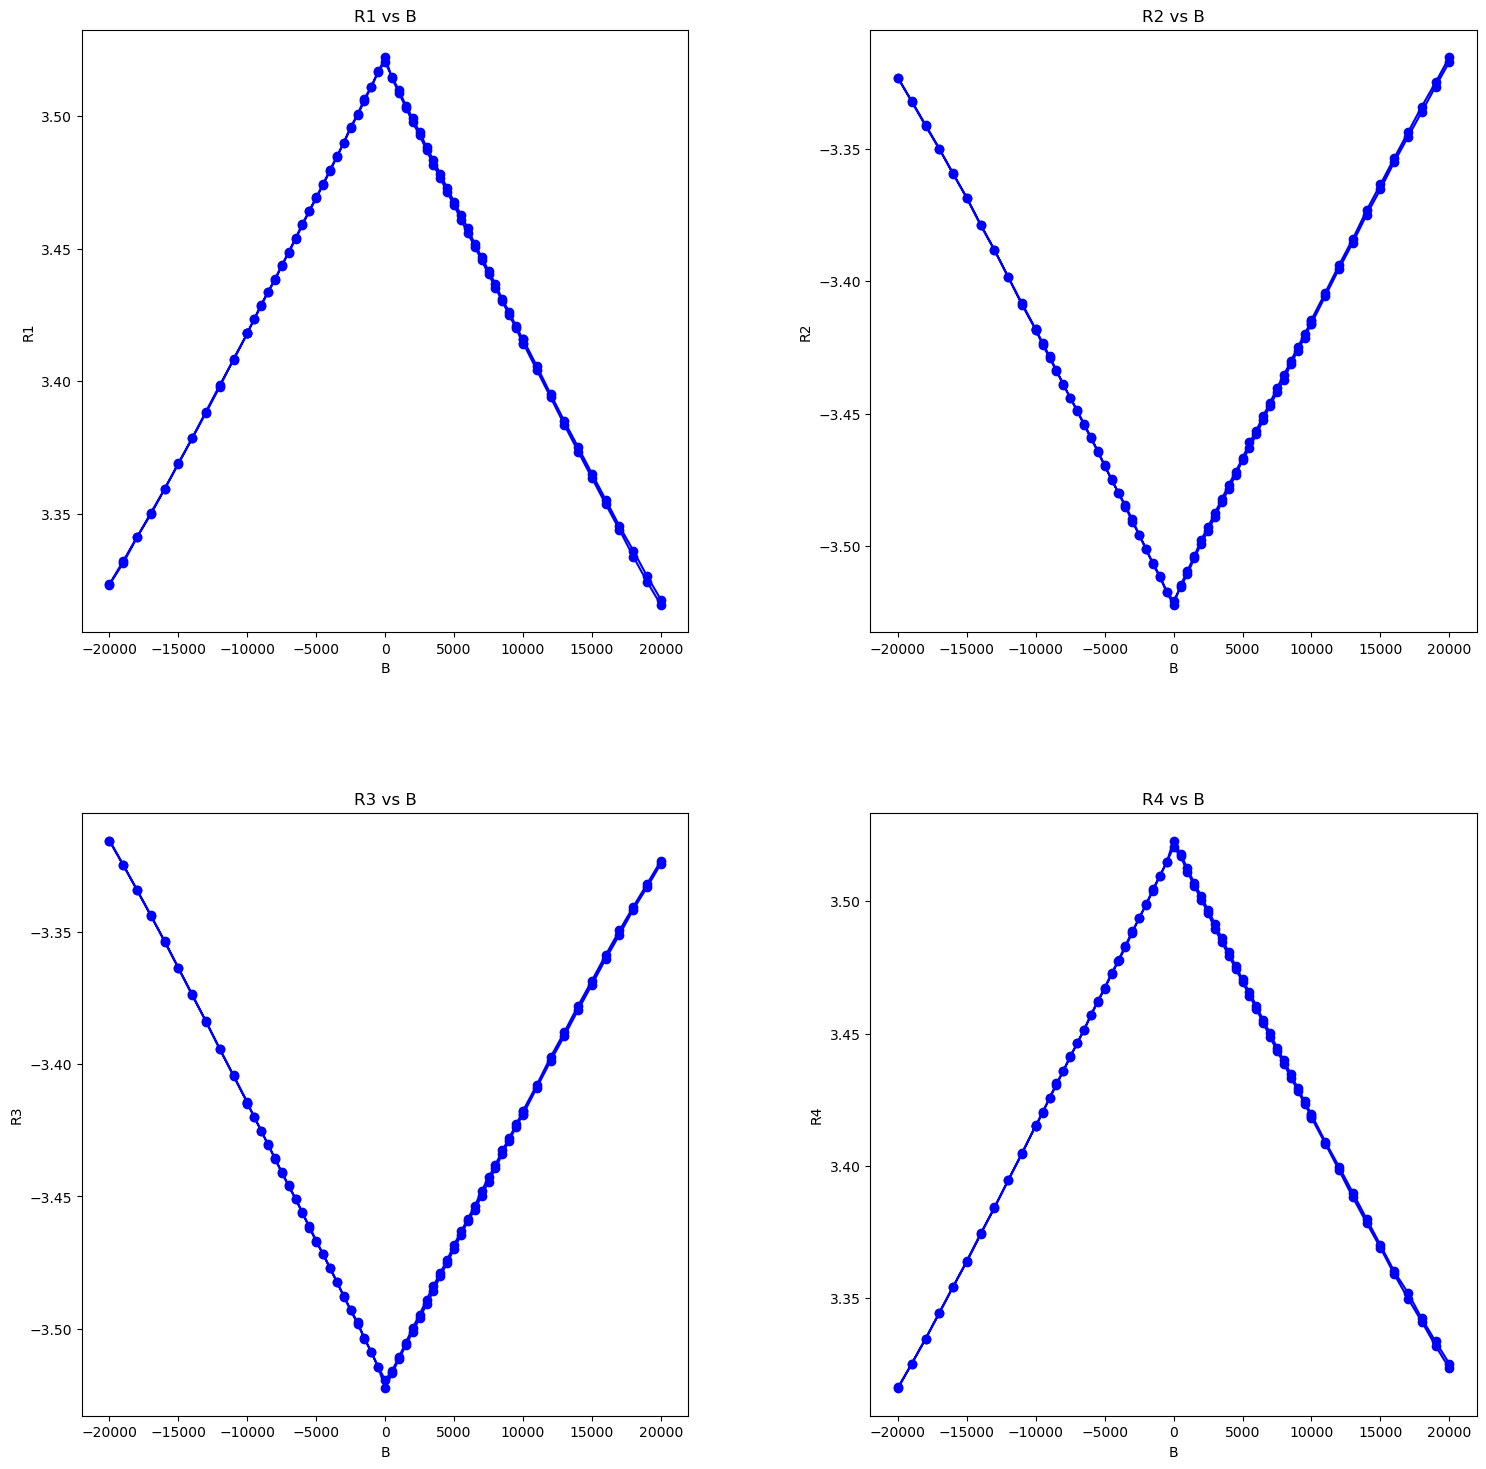

In [9]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

### Truncating intial data (0 to 1 T)

In [10]:
if(truncate):
    B_max = max(df['B_int'])
    B_max_first_idx = 0
    for i in range(len(df)):
        if df.iloc[i].B_int == B_max:
            B_max_first_idx = i
            break
    print(B_max_first_idx)

    df = df.iloc[B_max_first_idx+1:].copy()
    df.reset_index(inplace = True, drop = True) # resetting index

In [11]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

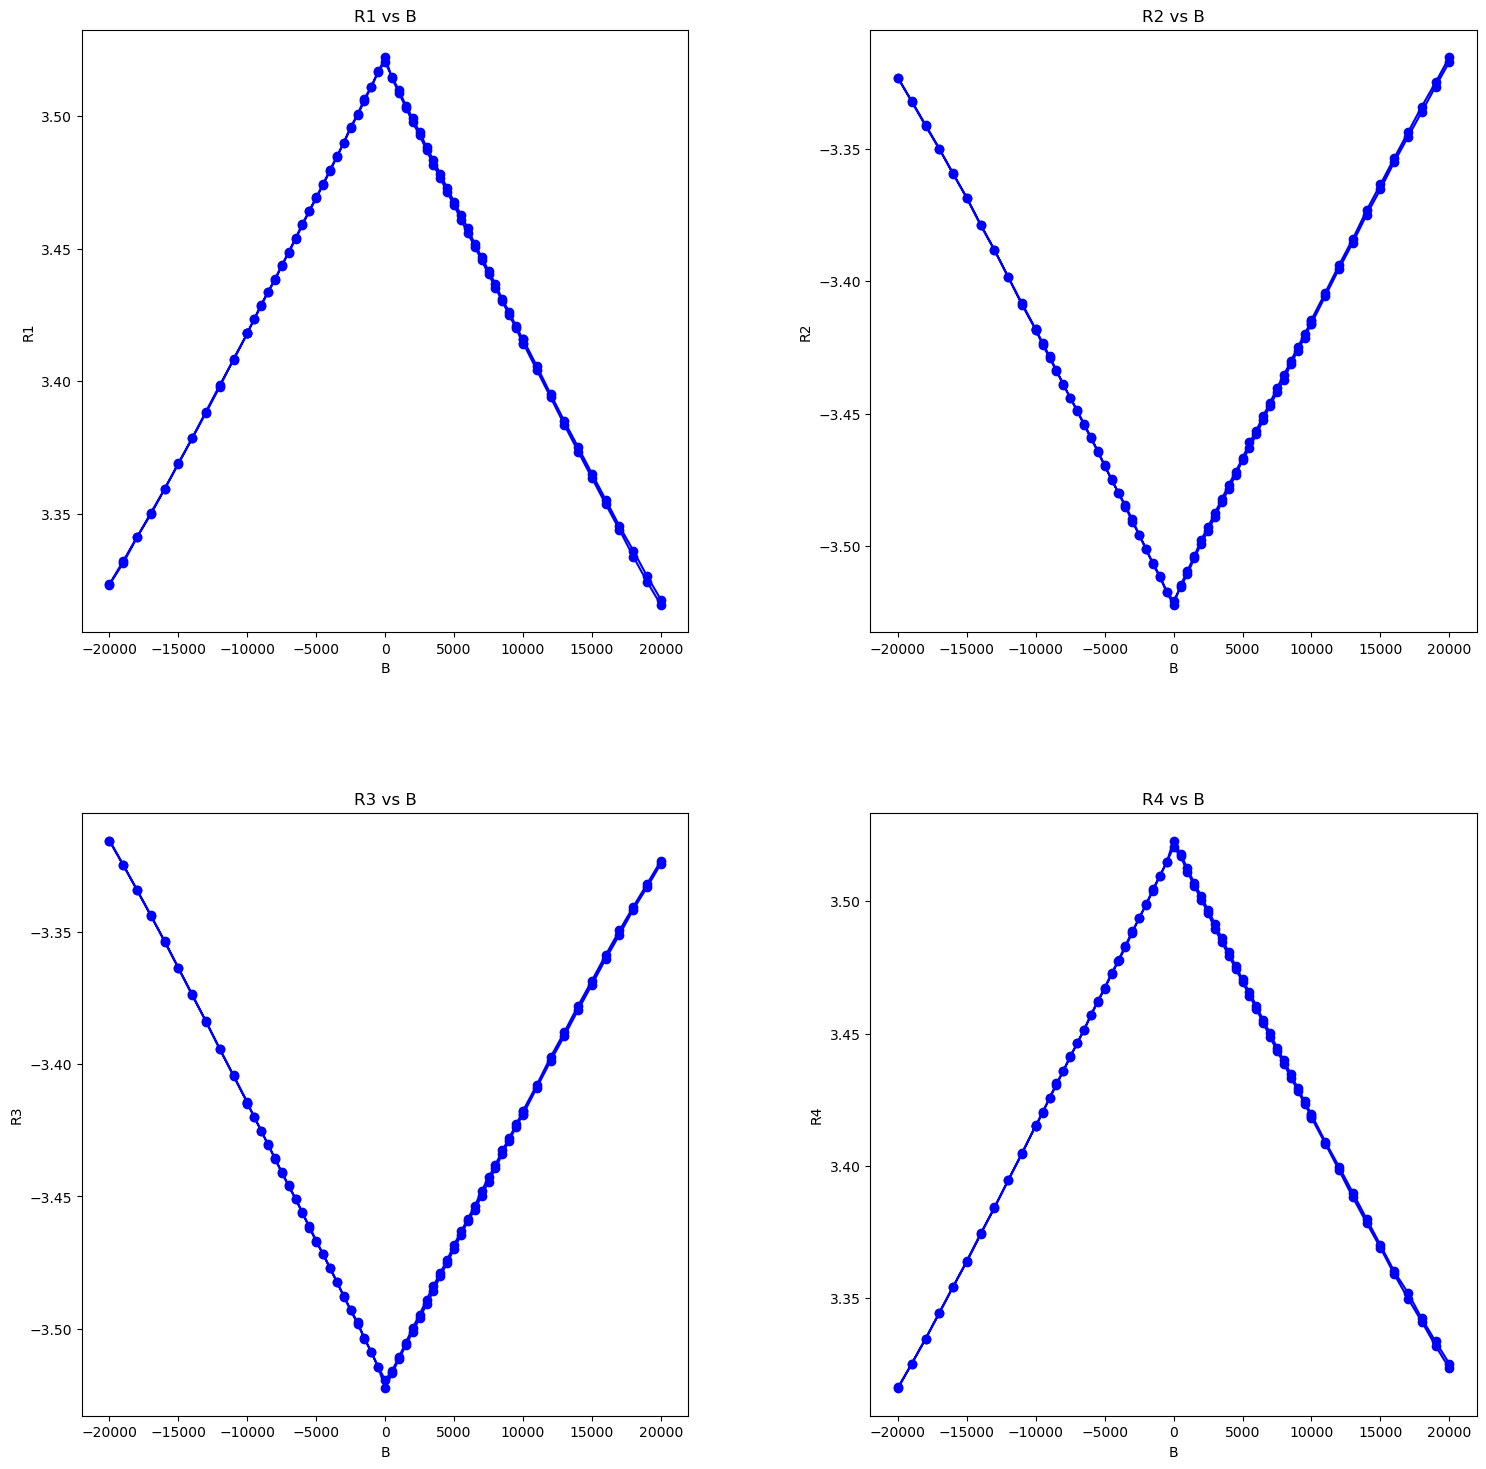

In [12]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()


## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [13]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

20000 -20000


In [14]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

62

In [15]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [16]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.00005,20000.622949,20000,149.999108,165.878721,-165.865232,-166.207017,166.263129,5.046000e-07,1000000.0
1,0.00005,19000.366113,19000,150.000464,166.320564,-166.330084,-166.650540,166.683901,5.286000e-07,1000000.0
2,0.00005,18000.597559,18000,150.000069,166.801803,-166.806791,-167.073106,167.117593,5.415000e-07,1000000.0
3,0.00005,17000.331152,17000,150.000139,167.264690,-167.281282,-167.548075,167.601733,5.380000e-07,1000000.0
4,0.00005,16000.584766,16000,150.000511,167.761976,-167.755621,-168.006190,168.008311,5.632000e-07,1000000.0


In [17]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
63,0.00005,-20000.570801,-20000,150.000858,166.163313,-166.167430,-165.772695,165.798145,5.971000e-07,1000000.0
64,0.00005,-19000.454004,-19000,150.000632,166.569587,-166.603675,-166.236819,166.266575,5.903000e-07,1000000.0
65,0.00005,-18000.309180,-18000,150.000871,167.053364,-167.050991,-166.697294,166.731874,6.026000e-07,1000000.0
66,0.00005,-17000.485840,-17000,150.000842,167.515025,-167.499343,-167.192355,167.223454,5.988000e-07,1000000.0
67,0.00005,-16000.320508,-16000,150.000681,167.963987,-167.980873,-167.668878,167.718355,6.117000e-07,1000000.0


In [18]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [19]:
data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data_dec = data_dec[data_dec['B_int_x'] == -1*data_dec['B_int_y']] # selecting 
data_dec = data_dec[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_dec.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_dec.reset_index(inplace = True, drop = True) # resetting index
data_dec.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.00005,20000,149.999108,165.878721,-165.865232,-166.207017,166.263129,166.163313,-166.167430,-165.772695,165.798145,1000000.0
1,0.00005,19000,150.000464,166.320564,-166.330084,-166.650540,166.683901,166.569587,-166.603675,-166.236819,166.266575,1000000.0
2,0.00005,18000,150.000069,166.801803,-166.806791,-167.073106,167.117593,167.053364,-167.050991,-166.697294,166.731874,1000000.0
3,0.00005,17000,150.000139,167.264690,-167.281282,-167.548075,167.601733,167.515025,-167.499343,-167.192355,167.223454,1000000.0
4,0.00005,16000,150.000511,167.761976,-167.755621,-168.006190,168.008311,167.963987,-167.980873,-167.668878,167.718355,1000000.0


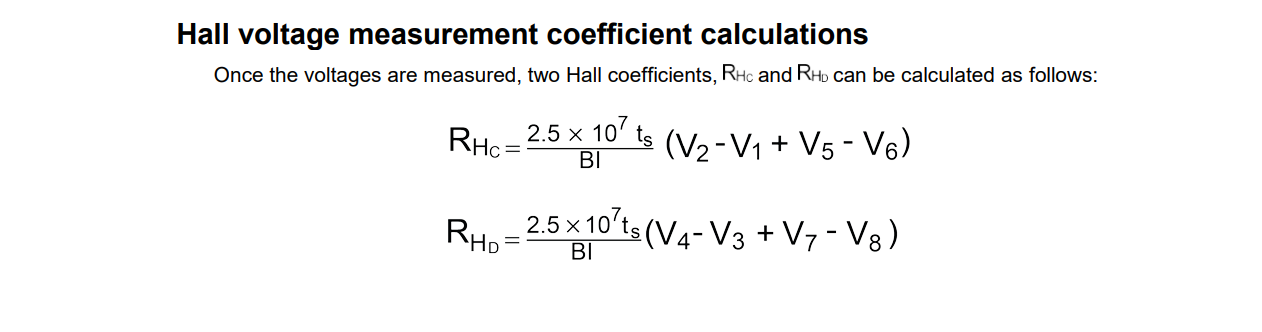
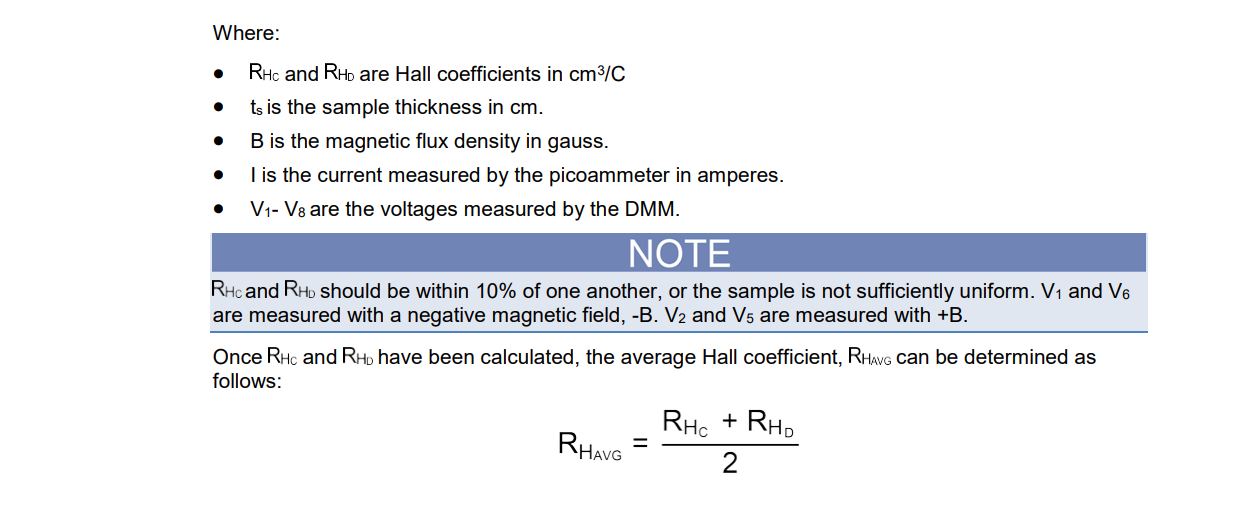

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [20]:
data_dec['RHc'] = (-data_dec['V2'] + data_dec['V1'] - data_dec['V5'] + data_dec['V6'])/(data_dec['I']*data_dec['multiplier'])
data_dec['RHd'] = (-data_dec['V4'] + data_dec['V3'] - data_dec['V7'] + data_dec['V8'])/(data_dec['I']*data_dec['multiplier'])
data_dec['R'] = (data_dec['RHc'] + data_dec['RHd'])/2

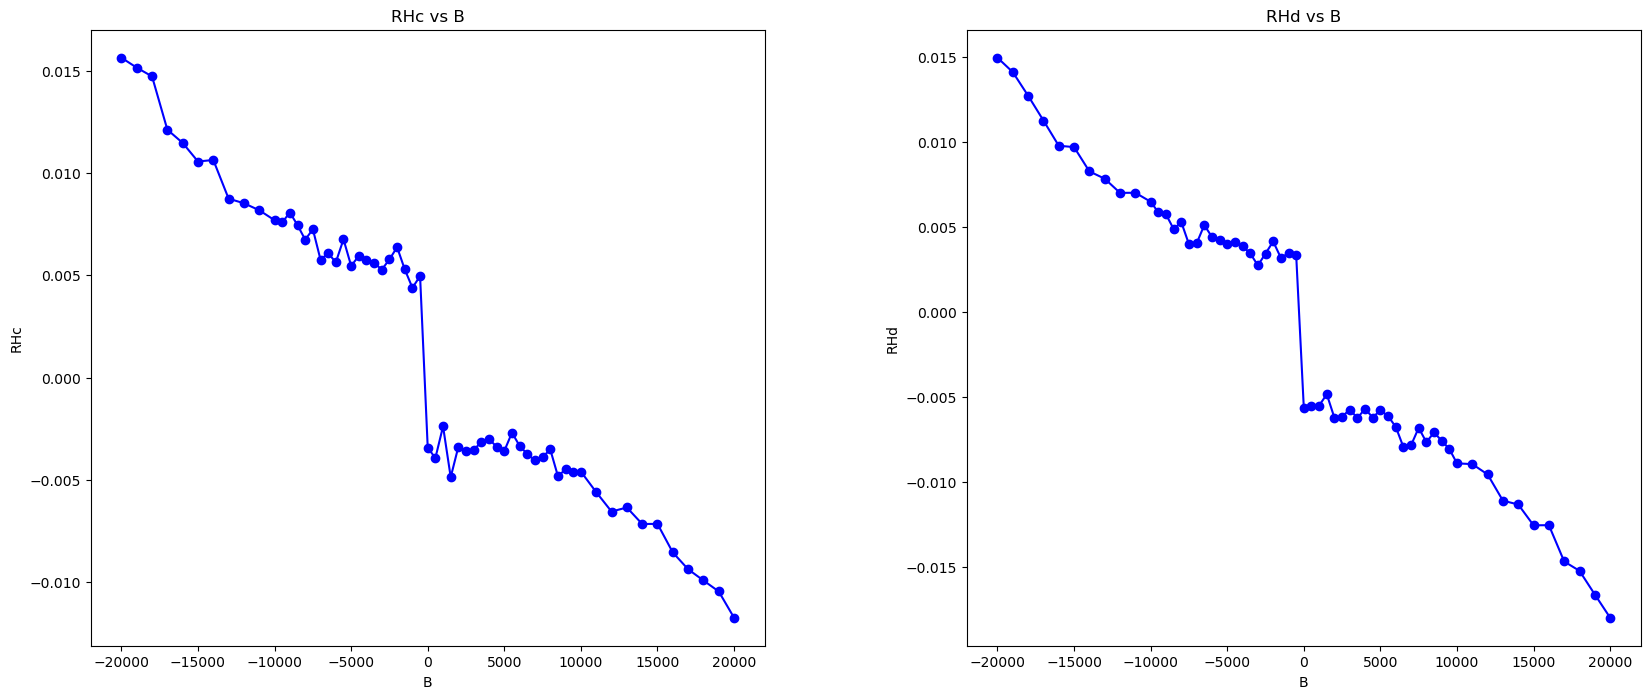

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_dec['B'],data_dec['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_dec['B'],data_dec['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

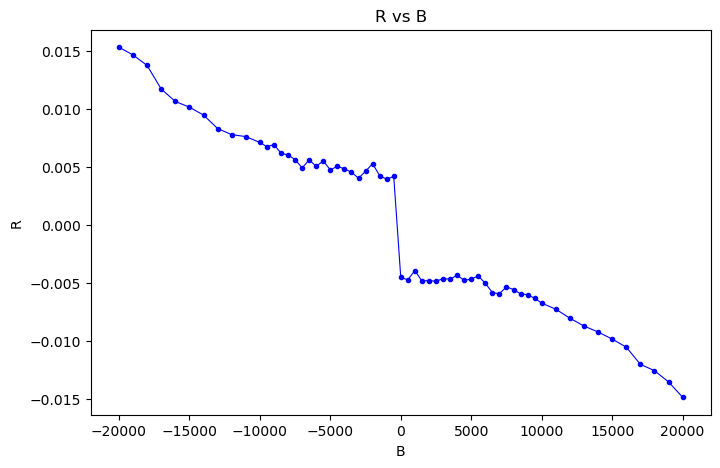

In [22]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'],data_dec['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [23]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data_inc = data_inc[data_inc['B_int_x'] == -1*data_inc['B_int_y']] # selecting 
data_inc = data_inc[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_inc.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_inc.reset_index(inplace = True, drop = True) # resetting index
data_inc.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.00005,-20000,150.000858,166.163313,-166.167430,-165.772695,165.798145,165.878721,-165.865232,-166.207017,166.263129,1000000.0
1,0.00005,-19000,150.000632,166.569587,-166.603675,-166.236819,166.266575,166.320564,-166.330084,-166.650540,166.683901,1000000.0
2,0.00005,-18000,150.000871,167.053364,-167.050991,-166.697294,166.731874,166.801803,-166.806791,-167.073106,167.117593,1000000.0
3,0.00005,-17000,150.000842,167.515025,-167.499343,-167.192355,167.223454,167.264690,-167.281282,-167.548075,167.601733,1000000.0
4,0.00005,-16000,150.000681,167.963987,-167.980873,-167.668878,167.718355,167.761976,-167.755621,-168.006190,168.008311,1000000.0


### Hall resistance calculation

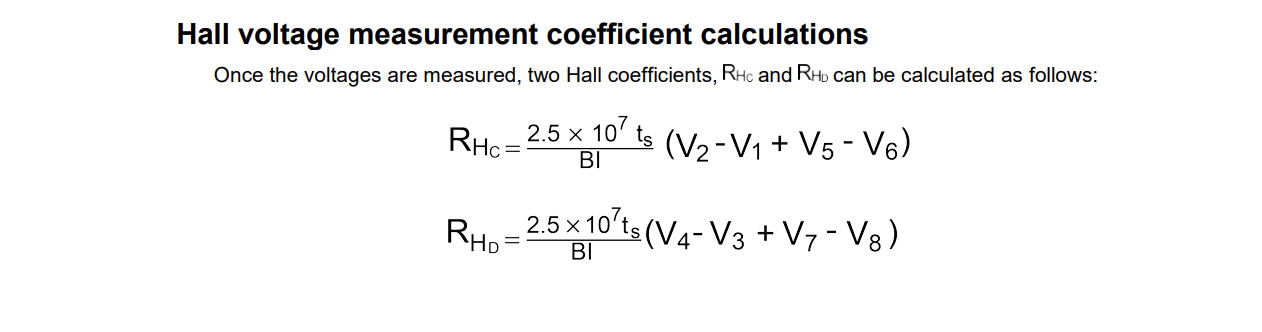

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [24]:
data_inc['RHc'] = (-data_inc['V2'] + data_inc['V1'] - data_inc['V5'] + data_inc['V6'])/(data_inc['I']*data_inc['multiplier'])
data_inc['RHd'] = (-data_inc['V4'] + data_inc['V3'] - data_inc['V7'] + data_inc['V8'])/(data_inc['I']*data_inc['multiplier'])

data_inc['R'] = (data_inc['RHc'] + data_inc['RHd'])/2

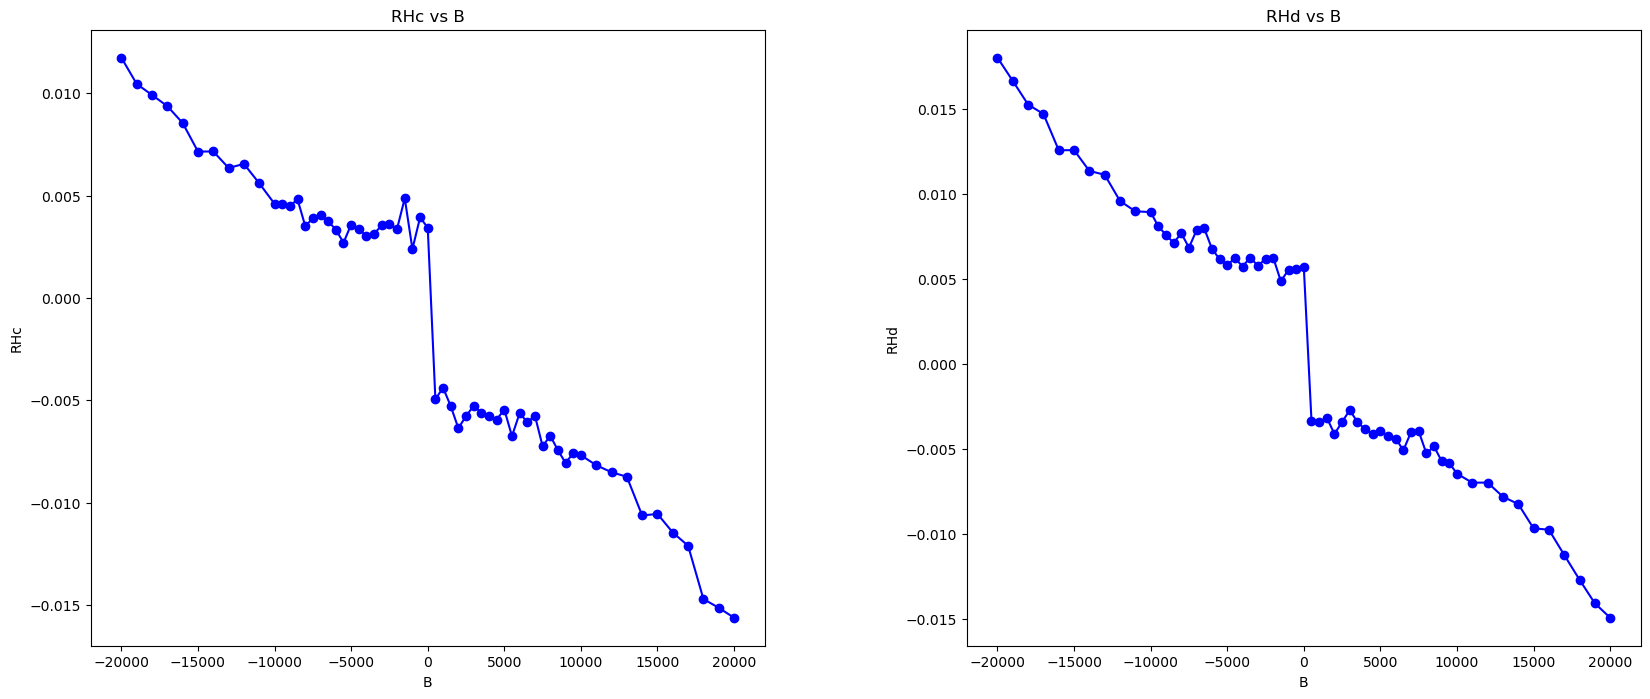

In [25]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_inc['B'],data_inc['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_inc['B'],data_inc['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

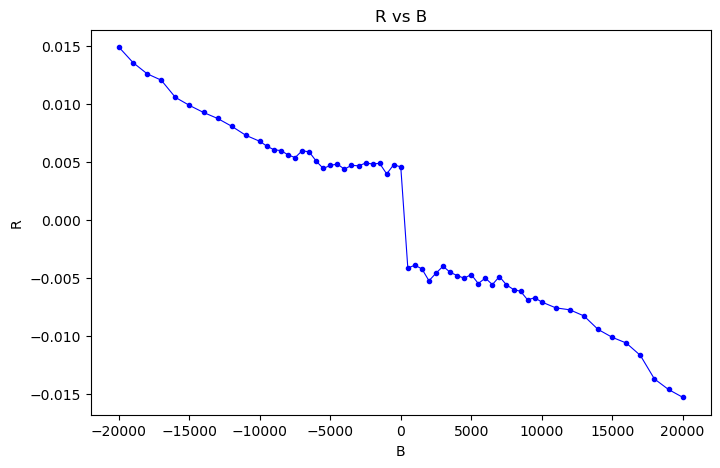

In [26]:
plt.figure(figsize=(8,5))
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

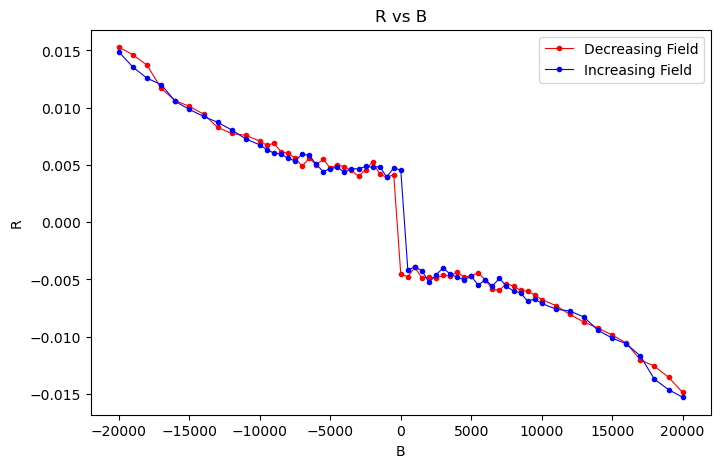

In [27]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'], data_dec['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()